# Order Data Analysis and Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv('new_orders.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert date column
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Create new features
df['profit_margin'] = df['profit'] / df['sales']

# Drop rows with missing order dates
df = df.dropna(subset=['order_date'])
df.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,profit_margin
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,0.32
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,0.20
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,0.07
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,0.10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,0.39


C:\Users\User\AppData\Local\Temp\ipykernel_6592\2185502014.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='region', y='sales', estimator=sum, ci=None)


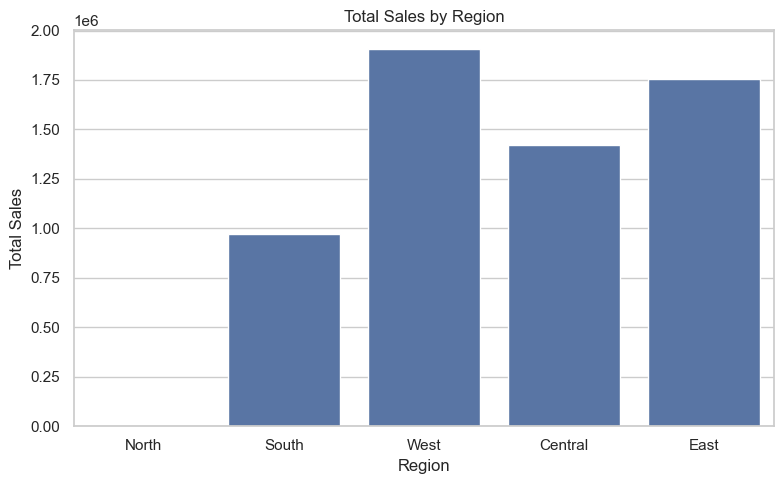

In [2]:
# Total Sales by Region
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='region', y='sales', estimator=sum, ci=None)
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6592\956746942.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='category', y='sales', estimator=sum, ci=None)


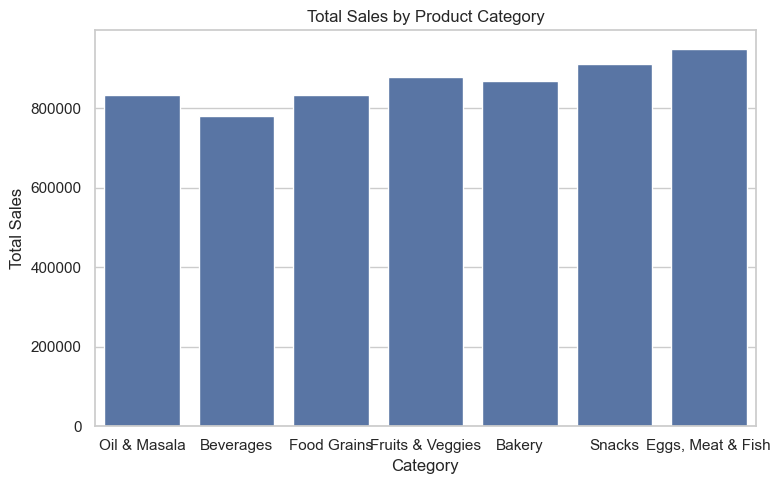

In [3]:
# Total Sales by Product Category
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='category', y='sales', estimator=sum, ci=None)
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6592\1299853627.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sub_category', y='sales', estimator=sum, ci=None)


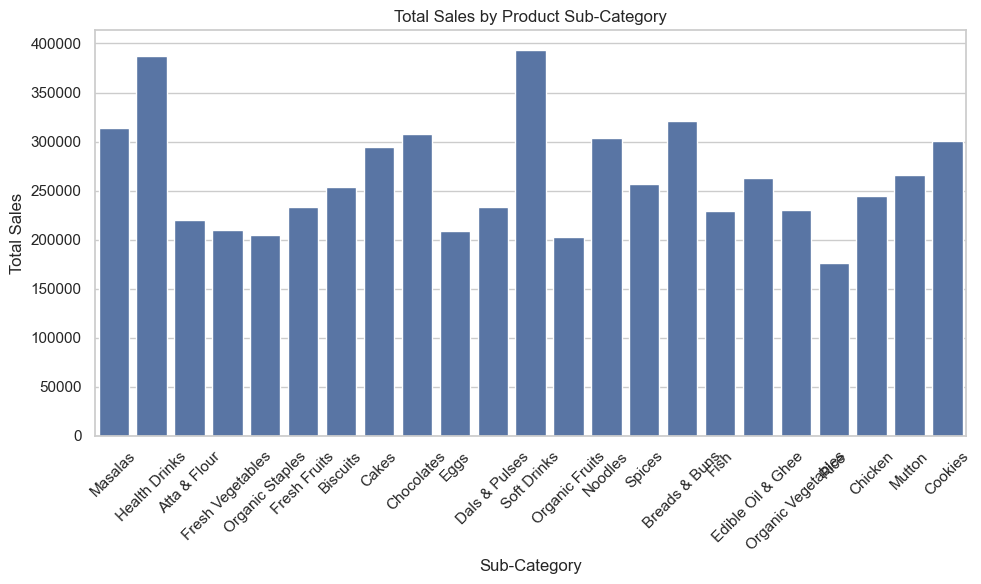

In [4]:
# Total Sales by Product Sub-Category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sub_category', y='sales', estimator=sum, ci=None)
plt.title('Total Sales by Product Sub-Category')
plt.ylabel('Total Sales')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

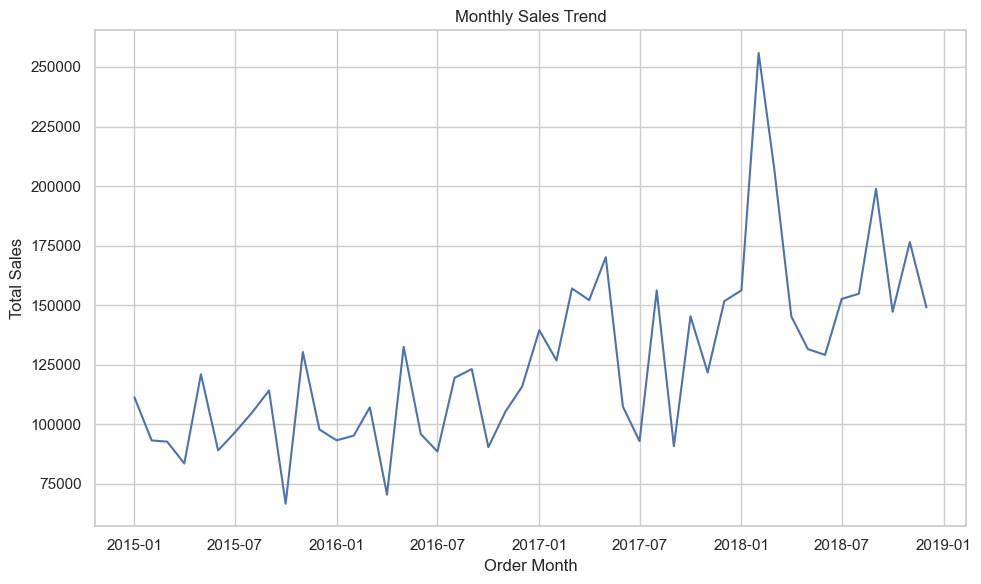

In [5]:
# Monthly Sales Trend
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

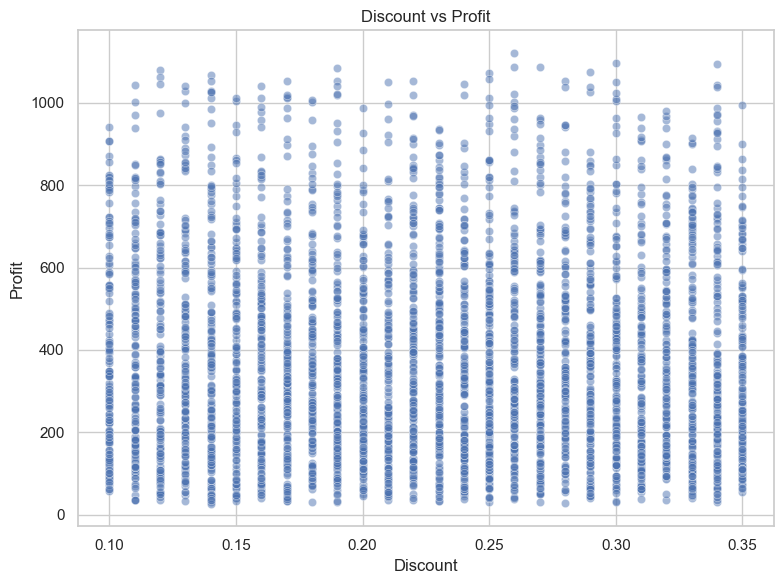

In [6]:
# Discount vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()